<a href="https://colab.research.google.com/github/menguri/Forcasting_cryptocurrencies/blob/main/Price_Expecting_of_Crypto_Currency.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



 # **I. Data 준비**

---



In [ ]:
# import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from IPython.display import Image
import time
from datetime import datetime

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# font download
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
plt.rc('font', family='NanumBarunGothic') 

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 37 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (6,734 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 155225 files and d

In [ ]:
# data loading
# 후에 Kaggle Notebook으로 제출할 땐 module 사용해서 데이터 로딩해야 함.
train= pd.read_csv('/content/drive/MyDrive/Data Science/Colab Notebooks/G-research/G-research/train.csv')
# example_sample_submission = pd.read_csv('/content/drive/MyDrive/Data Science/Colab Notebooks/G-research/G-research (1)/example_sample_submission.csv')
# example_test = pd.read_csv('/content/drive/MyDrive/Data Science/Colab Notebooks/G-research/G-research (1)/example_test.csv')
# supplemental_train = pd.read_csv('/content/drive/MyDrive/Data Science/Colab Notebooks/G-research/G-research (1)/supplemental_train.csv')


# 결측치를 모두 제거한 train 데이터셋 부르기

#train = pd.read_csv('/content/drive/MyDrive/Data Science/Colab Notebooks/G-research/G-research/train_new.csv', encoding='cp949')
asset_details = pd.read_csv('/content/drive/MyDrive/Data Science/Colab Notebooks/G-research/G-research/asset_details.csv')
print(train.info())
train.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24236806 entries, 0 to 24236805
Data columns (total 10 columns):
 #   Column     Dtype  
---  ------     -----  
 0   timestamp  int64  
 1   Asset_ID   int64  
 2   Count      float64
 3   Open       float64
 4   High       float64
 5   Low        float64
 6   Close      float64
 7   Volume     float64
 8   VWAP       float64
 9   Target     float64
dtypes: float64(8), int64(2)
memory usage: 1.8 GB
None


,timestamp,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target
0,1514764860,2,40.0,2376.5800,2399.5000,2357.1400,2374.5900,19.233005,2373.116392,-0.004218
1,1514764860,0,5.0,8.5300,8.5300,8.5300,8.5300,78.380000,8.530000,-0.014399
2,1514764860,1,229.0,13835.1940,14013.8000,13666.1100,13850.1760,31.550062,13827.062093,-0.014643
3,1514764860,5,32.0,7.6596,7.6596,7.6567,7.6576,6626.713370,7.657713,-0.013922
4,1514764860,7,5.0,25.9200,25.9200,25.8740,25.8770,121.087310,25.891363,-0.008264


In [ ]:
print(asset_details.info())
asset_details = asset_details.sort_values(by=['Asset_ID'], axis=0, ascending=True)
asset_details

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Asset_ID    14 non-null     int64  
 1   Weight      14 non-null     float64
 2   Asset_Name  14 non-null     object 
dtypes: float64(1), int64(1), object(1)
memory usage: 464.0+ bytes
None


,Asset_ID,Weight,Asset_Name
1,0,4.304065,Binance Coin
2,1,6.779922,Bitcoin
0,2,2.397895,Bitcoin Cash
10,3,4.406719,Cardano
13,4,3.555348,Dogecoin
3,5,1.386294,EOS.IO
5,6,5.894403,Ethereum
4,7,2.079442,Ethereum Classic
11,8,1.098612,IOTA
6,9,2.397895,Litecoin


In [ ]:
example_sample_submission = pd.read_csv('/content/drive/MyDrive/Data Science/Colab Notebooks/G-research/G-research/example_sample_submission.csv')
example_test = pd.read_csv('/content/drive/MyDrive/Data Science/Colab Notebooks/G-research/G-research/example_test.csv')
supplemental_train = pd.read_csv('/content/drive/MyDrive/Data Science/Colab Notebooks/G-research/G-research/supplemental_train.csv')

# An example of the data that will be delivered by the time series API. The data is just copied from train.csv.
print('--------example_sample_submission---------')
print(example_sample_submission.info())
print(example_sample_submission.head())
print('---------------------------------')

# An example of the data that will be delivered by the time series API.
print('--------example_test---------')
print(example_test.head())
print('---------------------------------')

# this file's data will be replaced with cryptoasset prices from the submission period.
print('--------supplemental_train---------')
print(supplemental_train.head())

--------example_sample_submission---------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   group_num  56 non-null     int64
 1   row_id     56 non-null     int64
 2   Target     56 non-null     int64
dtypes: int64(3)
memory usage: 1.4 KB
None
   group_num  row_id  Target
0          0       0       0
1          0       1       0
2          0       2       0
3          0       3       0
4          0       4       0
---------------------------------
--------example_test---------
    timestamp  Asset_ID   Count  ...          VWAP  group_num  row_id
0  1623542400         3  1201.0  ...      1.481439          0       0
1  1623542400         2  1020.0  ...    581.697038          0       1
2  1623542400         0   626.0  ...    344.441729          0       2
3  1623542400         1  2888.0  ...  35583.469303          0       3
4  1623542400         4   433.0  .

1. 시각화를 위해 간단하게 데이터를 나눠줍시다.

In [ ]:
# 코인 종류 리스트
asset_name_list = list(asset_details['Asset_Name'])             

# 코인별 데이터 준비
bin = train.query('Asset_ID == 0').set_index("timestamp")
btc = train.query('Asset_ID == 1').set_index("timestamp")
btc_c = train.query('Asset_ID == 2').set_index("timestamp")
cda = train.query('Asset_ID == 3').set_index("timestamp")
dog = train.query('Asset_ID == 4').set_index("timestamp")
eos = train.query('Asset_ID == 5').set_index("timestamp")
eth = train.query('Asset_ID == 6').set_index("timestamp")
eth_c = train.query('Asset_ID == 7').set_index("timestamp")
lot = train.query('Asset_ID == 8').set_index("timestamp")
lit = train.query('Asset_ID == 9').set_index("timestamp")
mak = train.query('Asset_ID == 10').set_index("timestamp")
mon = train.query('Asset_ID == 11').set_index("timestamp")
ste = train.query('Asset_ID == 12').set_index("timestamp")
tro = train.query('Asset_ID == 13').set_index("timestamp")

In [ ]:
bin.head()

,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target
timestamp,,,,,,,,,
1514764860,0,5.0,8.5300,8.5300,8.5300,8.5300,78.38,8.530000,-0.014399
1514764920,0,7.0,8.5300,8.5300,8.5145,8.5145,71.39,8.520215,-0.015875
1514764980,0,45.0,8.5065,8.5299,8.4848,8.4848,1546.82,8.501394,-0.015410
1514765040,0,14.0,8.5009,8.5066,8.4744,8.5009,125.80,8.479810,-0.012524
1514765100,0,5.0,8.5007,8.5007,8.4560,8.4560,125.01,8.458435,-0.005940


2. timestamp의 간격을 동일하게 만들어 줍시다.

In [ ]:
# timstamp 기간 확인
#[bin, btc, btc_c, cda, dog, eos, eth, eth_c, lot, lit, mak, mon, ste, tro]

print(f'--------------------bin--------------------')
beg = bin.index[0].astype('datetime64[s]')
end = bin.index[-1].astype('datetime64[s]')
print(f'{beg} ~ {end}')

print(f'--------------------btc--------------------')
beg = btc.index[0].astype('datetime64[s]')
end = btc.index[-1].astype('datetime64[s]')
print(f'{beg} ~ {end}')

print(f'--------------------btc_c--------------------')
beg = btc_c.index[0].astype('datetime64[s]')
end = btc_c.index[-1].astype('datetime64[s]')
print(f'{beg} ~ {end}')

print(f'--------------------cda--------------------')
beg = cda.index[0].astype('datetime64[s]')
end = cda.index[-1].astype('datetime64[s]')
print(f'{beg} ~ {end}')

print(f'--------------------dog--------------------')
beg = dog.index[0].astype('datetime64[s]')
end = dog.index[-1].astype('datetime64[s]')
print(f'{beg} ~ {end}')

print(f'--------------------eos--------------------')
beg = eos.index[0].astype('datetime64[s]')
end = eos.index[-1].astype('datetime64[s]')
print(f'{beg} ~ {end}')

print(f'--------------------eth--------------------')
beg = eth.index[0].astype('datetime64[s]')
end = eth.index[-1].astype('datetime64[s]')
print(f'{beg} ~ {end}')

print(f'--------------------eth_c--------------------')
beg = eth_c.index[0].astype('datetime64[s]')
end = eth_c.index[-1].astype('datetime64[s]')
print(f'{beg} ~ {end}')

print(f'--------------------lot--------------------')
beg = lot.index[0].astype('datetime64[s]')
end = lot.index[-1].astype('datetime64[s]')
print(f'{beg} ~ {end}')

print(f'--------------------lit--------------------')
beg = lit.index[0].astype('datetime64[s]')
end = lit.index[-1].astype('datetime64[s]')
print(f'{beg} ~ {end}')

print(f'--------------------mak--------------------')
beg = mak.index[0].astype('datetime64[s]')
end = mak.index[-1].astype('datetime64[s]')
print(f'{beg} ~ {end}')

print(f'--------------------mon--------------------')
beg = mon.index[0].astype('datetime64[s]')
end = mon.index[-1].astype('datetime64[s]')
print(f'{beg} ~ {end}')

print(f'--------------------ste--------------------')
beg = ste.index[0].astype('datetime64[s]')
end = ste.index[-1].astype('datetime64[s]')
print(f'{beg} ~ {end}')

print(f'--------------------tro--------------------')
beg = tro.index[0].astype('datetime64[s]')
end = tro.index[-1].astype('datetime64[s]')
print(f'{beg} ~ {end}')



# cda, dog, lot, mak, ste, tro 의 시작점이 다르다.

--------------------bin--------------------
2018-01-01T00:01:00 ~ 2021-09-21T00:00:00
--------------------btc--------------------
2018-01-01T00:01:00 ~ 2021-09-21T00:00:00
--------------------btc_c--------------------
2018-01-01T00:01:00 ~ 2021-09-21T00:00:00
--------------------cda--------------------
2018-04-17T09:11:00 ~ 2021-09-21T00:00:00
--------------------dog--------------------
2019-04-12T14:34:00 ~ 2021-09-21T00:00:00
--------------------eos--------------------
2018-01-01T00:01:00 ~ 2021-09-21T00:00:00
--------------------eth--------------------
2018-01-01T00:01:00 ~ 2021-09-21T00:00:00
--------------------eth_c--------------------
2018-01-01T00:01:00 ~ 2021-09-21T00:00:00
--------------------lot--------------------
2018-05-09T08:07:00 ~ 2021-09-21T00:00:00
--------------------lit--------------------
2018-01-01T00:01:00 ~ 2021-09-21T00:00:00
--------------------mak--------------------
2018-05-10T15:21:00 ~ 2021-09-21T00:00:00
--------------------mon--------------------
2018-0

In [ ]:
# timstamp 간격을 모두 동일하게 만들어 주자.

print(f'--------------------bin--------------------')
bin_fill_range = range(bin.index[0], bin.index[-1]+60, 60)
bin = bin.reindex(bin_fill_range, method='pad')

print(f'--------------------btc--------------------')
btc_fill_range = range(btc.index[0], btc.index[-1]+60, 60)
btc = btc.reindex(btc_fill_range, method='pad')

print(f'--------------------btc_c--------------------')
btc_c_fill_range = range(btc_c.index[0], btc_c.index[-1]+60, 60)
btc_c = btc_c.reindex(btc_c_fill_range, method='pad')

print(f'--------------------cda--------------------')
cda_fill_range = range(cda.index[0], cda.index[-1]+60, 60)
cda = cda.reindex(cda_fill_range, method='pad')

print(f'--------------------dog--------------------')
dog_fill_range = range(dog.index[0], dog.index[-1]+60, 60)
dog = dog.reindex(dog_fill_range, method='pad')

print(f'--------------------eos--------------------')
eos_fill_range = range(eos.index[0], eos.index[-1]+60, 60)
eos = eos.reindex(eos_fill_range, method='pad')

print(f'--------------------eth--------------------')
eth_fill_range = range(eth.index[0], eth.index[-1]+60, 60)
eth = eth.reindex(eth_fill_range, method='pad')

print(f'--------------------eth_c--------------------')
eth_c_fill_range = range(eth_c.index[0], eth_c.index[-1]+60, 60)
eth_c = eth_c.reindex(eth_c_fill_range, method='pad')

print(f'--------------------lot--------------------')
lot_fill_range = range(lot.index[0], lot.index[-1]+60, 60)
lot = lot.reindex(lot_fill_range, method='pad')

print(f'--------------------lit--------------------')
lit_fill_range = range(lit.index[0], lit.index[-1]+60, 60)
lit = lit.reindex(lit_fill_range, method='pad')

print(f'--------------------mak--------------------')
mak_fill_range = range(mak.index[0], mak.index[-1]+60, 60)
mak = mak.reindex(mak_fill_range, method='pad')

print(f'--------------------mon--------------------')
mon_fill_range = range(mon.index[0], mon.index[-1]+60, 60)
mon = mon.reindex(mon_fill_range, method='pad')

print(f'--------------------ste--------------------')
ste_fill_range = range(ste.index[0], ste.index[-1]+60, 60)
ste = ste.reindex(ste_fill_range, method='pad')

print(f'--------------------tro--------------------')
tro_fill_range = range(tro.index[0], tro.index[-1]+60, 60)
tro = tro.reindex(tro_fill_range, method='pad')

--------------------bin--------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1956960 entries, 1514764860 to 1632182400
Data columns (total 9 columns):
 #   Column    Dtype  
---  ------    -----  
 0   Asset_ID  int64  
 1   Count     float64
 2   Open      float64
 3   High      float64
 4   Low       float64
 5   Close     float64
 6   Volume    float64
 7   VWAP      float64
 8   Target    float64
dtypes: float64(8), int64(1)
memory usage: 134.4 MB
None
--------------------btc--------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1956960 entries, 1514764860 to 1632182400
Data columns (total 9 columns):
 #   Column    Dtype  
---  ------    -----  
 0   Asset_ID  int64  
 1   Count     float64
 2   Open      float64
 3   High      float64
 4   Low       float64
 5   Close     float64
 6   Volume    float64
 7   VWAP      float64
 8   Target    float64
dtypes: float64(8), int64(1)
memory usage: 134.4 MB
None
--------------------btc_c-------------------

# **II. 데이터 탐색&시각화**

---



1.  Volatility of Crypto Currencies

They look like moving altogether.

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


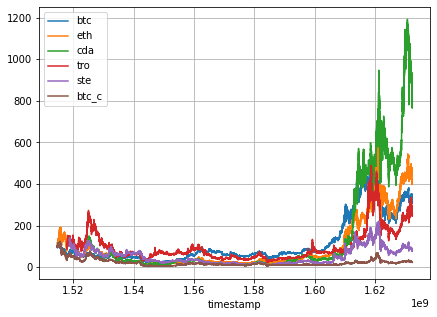

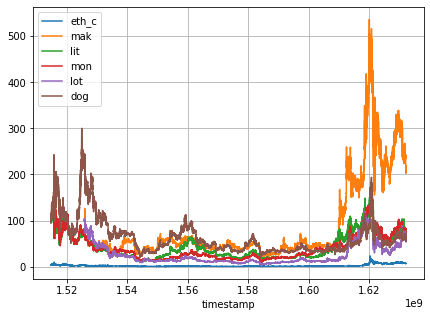

In [ ]:
# Close 값의 양상 비교 -> 처음값으로부터 얼마나 변동했는지.
# 코인들의 변동 양상이 비슷하다. 하지만 변동 정도는 제각각 다르다. 가격 예측할 때 가중치를 둬야 함. 

btc_normalization = btc.Close.div(btc.Close.iloc[0]).mul(100)
eth_normalization = eth.Close.div(eth.Close.iloc[0]).mul(100)
cda_normalization = cda.Close.div(cda.Close.iloc[0]).mul(100)
bin_normalization = bin.Close.div(bin.Close.iloc[0]).mul(100)
mak_normalization = mak.Close.div(mak.Close.iloc[0]).mul(100)
lit_normalization = lit.Close.div(lit.Close.iloc[0]).mul(100)
mon_normalization = mon.Close.div(mon.Close.iloc[0]).mul(100)
lot_normalization = lot.Close.div(lot.Close.iloc[0]).mul(100)
dog_normalization = dog.Close.div(dog.Close.iloc[0]).mul(100)
eos_normalization = eos.Close.div(eos.Close.iloc[0]).mul(100)
tro_normalization = tro.Close.div(tro.Close.iloc[0]).mul(100)
ste_normalization = ste.Close.div(ste.Close.iloc[0]).mul(100)
btc_c_normalization = btc_c.Close.div(btc_c.Close.iloc[0]).mul(100)
eth_c_normalization = eth_c.Close.div(eth.Close.iloc[0]).mul(100)


plt.figure(figsize=(7, 5))
btc_normalization.plot()
eth_normalization.plot()
cda_normalization.plot()
#bin_normalization.plot() 얘는 혼자 너무 크다.
tro_normalization.plot()
ste_normalization.plot()
btc_c_normalization.plot()
plt.legend(['btc', 'eth', 'cda', 'tro', 'ste', 'btc_c'])
plt.grid()
plt.show()


plt.figure(figsize=(7, 5))
eth_c_normalization.plot()
mak_normalization.plot()
lit_normalization.plot()
mon_normalization.plot()
lot_normalization.plot()
#dog_normalization.plot() 얘도 혼자 너무 크다.
eos_normalization.plot()
plt.legend(['eth_c', 'mak', 'lit', 'mon', 'lot', 'dog', 'eos'])
plt.grid()
plt.show()

2. Correlation with each other Crypto Currencies

High correlation. In here, we should uncover 'trigger' which move other crypto currencies. first, Let's find first mover. 

In [ ]:
# 로그 변환 처리를 위해 함수를 만들기
def log_return(series, periods=1):
    return np.log(series).diff(periods=periods)

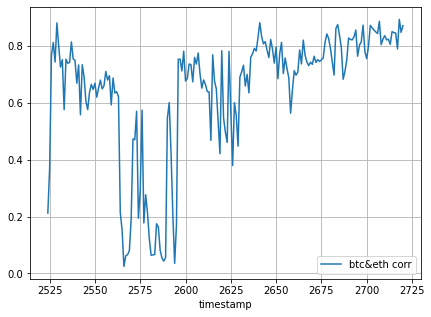

In [ ]:
# btc & eth / 아주 그냥 상관관계가 들쭉날쭉이다.

df_lret_btc = log_return(btc['Close'])[1:]
df_lret_eth = log_return(eth['Close'])[1:]
df_lret_btc.rename('lret_btc', inplace=True)
df_lret_eth.rename('lret_eth', inplace=True)
two_lret = pd.concat([df_lret_btc, df_lret_eth], axis=1)
two_lret_corr = two_lret.groupby(two_lret.index//(60*10000)).corr().loc[:,"lret_btc"].loc[:,"lret_eth"]

plt.figure(figsize=(7, 5))
two_lret_corr.plot()
plt.legend(['btc&eth corr'])
plt.grid()
plt.show()

In [ ]:
pd.set_option('display.max_rows', None)

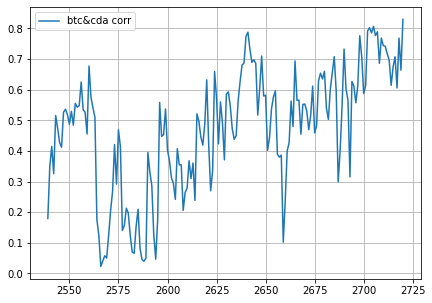

In [ ]:
# btc& cda / cda도 eth와 마찬가지로 257.5 시기에 상관관계가 떨어졌고, 그 이후에 올라가는 양상을 보이고 있다. 

df_lret_cda = log_return(cda['Close'][1:])
df_lret_cda.rename('lret_cda', inplace=True)
two_lret = pd.concat([df_lret_btc, df_lret_cda], axis=1)
two_lret_corr = two_lret.groupby(two_lret.index//(60*10000)).corr().loc[:, 'lret_btc'].loc[:, 'lret_cda'][1:]                  

plt.figure(figsize=(7, 5))
two_lret_corr.plot()
plt.legend(['btc&cda corr'])
plt.grid()
plt.show()

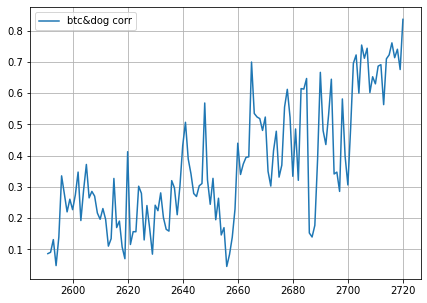

In [ ]:
# btc& dog / 도지코인도 큰 흐름으로 보았을 때, 255에서 상관도 하락/ 265에서 다시 하락/ 268에서도 다시한번 하락했다. 이는 cda, eth의 그래프와도 밀접한 상관관계를 가지고 있을 것으로 보인다. 

df_lret_dog = log_return(dog['Close'][1:])
df_lret_dog.rename('lret_dog', inplace=True)
two_lret = pd.concat([df_lret_btc, df_lret_dog], axis=1)
two_lret_corr = two_lret.groupby(two_lret.index//(60*10000)).corr().loc[:, 'lret_btc'].loc[:, 'lret_dog'][1:]                  

plt.figure(figsize=(7, 5))
two_lret_corr.plot()
plt.legend(['btc&dog corr'])
plt.grid()
plt.show()

In [ ]:
# 같은 양상을 보였던(일제히 상관도가 떨어졌던..) 시기 살펴보기 -> 상관성이 요동친다.
from datetime import datetime

# 1번째 하락
print('--------------------- 1st ---------------------')
timestamp = [2564, 2565, 2566, 2567, 2568, 2569, 2570]
for i in timestamp:
  time = i * (60*10000)
  datetime = datetime.fromtimestamp(time)
  print(datetime)

# 2번째 하락
print('--------------------- 2nd ---------------------')
timestamp = [2580, 2581, 2582, 2583, 2585, 2586, 2587, 2588, 2589]
for i in timestamp:
  time = i * (60*10000)
  datetime = datetime.fromtimestamp(time)
  print(datetime)


# 2018.10-2018.11 비트코인 가격 약 40% 하락
# 2019.01-2019.03 비트코인 가격 약 18% - 4,5,6월 약 90% 상승

--------------------- 1st ---------------------
2018-10-01 13:20:00
2018-10-08 12:00:00
2018-10-15 10:40:00
2018-10-22 09:20:00
2018-10-29 08:00:00
2018-11-05 06:40:00
2018-11-12 05:20:00
--------------------- 2nd ---------------------
2019-01-20 16:00:00
2019-01-27 14:40:00
2019-02-03 13:20:00
2019-02-10 12:00:00
2019-02-24 09:20:00
2019-03-03 08:00:00
2019-03-10 06:40:00
2019-03-17 05:20:00
2019-03-24 04:00:00


In [ ]:
time = 1538400000
datetime = datetime.fromtimestamp(time)
datetime

datetime.datetime(2018, 10, 1, 13, 20)

In [ ]:
# totimestamp 변환
totimestamp = lambda s : np.int32(time.mktime(datetime.strptime(s, "%d/%m/%Y").timetuple()))

# 모든 코인끼리의 상관관계 살피기
from pandas.core.tools.datetimes import to_datetime

# 빈 데이터프레임을 초기화합니다.
all_assets_2021 = pd.DataFrame([])

for assert_id, assert_num in zip(asset_details['Asset_ID'], asset_details['Asset_Name']):
  asset = train.query(f'Asset_ID == {assert_id}').set_index("timestamp")
  # 원하는 시간대 추출
  asset = asset.loc[totimestamp('01/01/2021'):totimestamp('01/05/2021')]

  # asset 간격을 60으로 맞추기
  asset_fill_range = range(asset.index[0], asset.index[-1]+60, 60)
  asset = asset.reindex(asset_fill_range, method='pad')

  # 로그 변환
  asset_lret = log_return(asset['Close'])[1:]

  # join
  all_assets_2021 = all_assets_2021.join(asset_lret, rsuffix=assert_num, how='outer')
  

In [ ]:
all_assets_2021.head()

,Close,CloseBitcoin,CloseBitcoin Cash,CloseCardano,CloseDogecoin,CloseEOS.IO,CloseEthereum,CloseEthereum Classic,CloseIOTA,CloseLitecoin,CloseMaker,CloseMonero,CloseStellar,CloseTRON
timestamp,,,,,,,,,,,,,,
1609459320,-0.001544,-0.001014,-0.001111,-0.001161,-0.001016,-0.000244,-0.001350,0.001606,0.000506,-0.001231,0.000180,-0.000671,-0.004668,-0.000697
1609459380,-0.001067,0.000090,-0.000536,-0.001886,-0.000086,0.000026,-0.000506,-0.000705,-0.001351,-0.000454,-0.000689,0.000192,-0.000205,-0.000946
1609459440,0.000011,-0.000175,-0.000767,-0.002209,0.000096,-0.000019,-0.000669,-0.000512,0.001351,-0.000211,0.001069,-0.001376,0.001456,-0.000187
1609459500,-0.002118,-0.001318,-0.001580,-0.001515,-0.000385,-0.001028,-0.001757,-0.000393,-0.001182,-0.001430,0.000046,-0.000320,0.000455,-0.000835
1609459560,-0.001865,0.000105,-0.000151,-0.000747,0.000128,-0.000116,0.000035,-0.001123,-0.001014,0.000026,0.000759,-0.000481,-0.000394,-0.000199


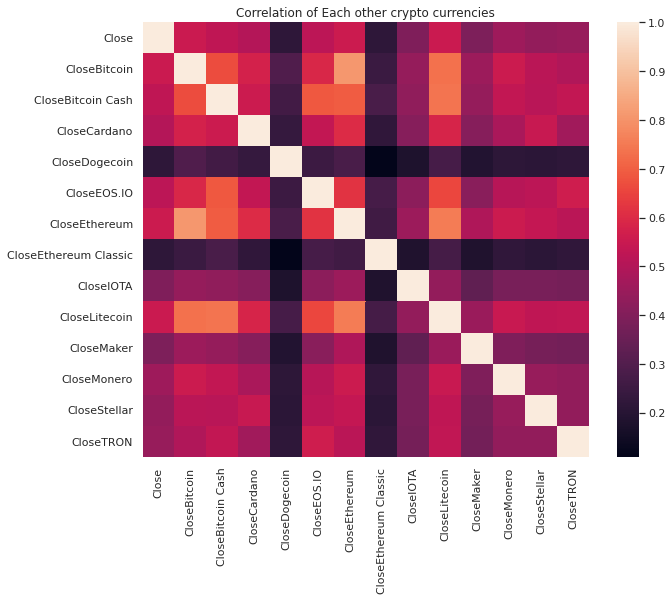

In [ ]:
# 암호화폐 간 연관성은 상당하다. 모든 암화화폐가 연결되어 있는 것처럼 보이지만, 
# 게임 무버가 숨어있을 가능성이 크다. 유력한 후보 : Bitcoin.
all_assets_corr = all_assets_2021.corr()
sns.set( rc = {'figure.figsize':(10, 8)} )
sns.heatmap(all_assets_corr)
plt.title('Correlation of Each other crypto currencies')
plt.show()

In [ ]:
# Granger Causality in Time Series
# but before using this way, should check the data is stationary. if not stationary, will transform
# ADF test
from statsmodels.tsa.stattools import adfuller

all_assets_2021_trans = all_assets_2021.diff().dropna()
all_assets_2021_trans = all_assets_2021_trans.iloc[1:]

# not_stationary = []
# for i in list(all_assets_2021.columns):
#   print(f'------------{i}------------')
#   result = adfuller(all_assets_2021[i])
#   print(f'p-value: {result[1]}')
#   if result[1] > 0.05:
#       print("Series is not stationary")
#       not_stationary.append(i)
#   else:
#       print("Series is stationary") 

# print(not_stationary)

In [ ]:
# Granger Cauality
from statsmodels.tsa.stattools import grangercausalitytests

grangercausalitytests(all_assets_2021_trans[['CloseBitcoin', 'CloseEthereum']], maxlag=10, verbose=False)

In [ ]:
# Granger Cauality
# ...? they move altogether
from statsmodels.tsa.stattools import grangercausalitytests

maxlag = 10
test = 'ssr_chi2test'
def grangers_casuality (train, variables, test = 'ssr_chi2test', verbose=False):
  dataset = pd.DataFrame(np.zeros((len(variables), len(variables))), columns= variables, index=variables)
  for c in dataset.columns:
    for r in dataset.index:
      test_result = grangercausalitytests(all_assets_2021_trans[[r, c]], maxlag=maxlag, verbose=False)
      p_values = [round(test_result[i+1][0][test][1], 4) for i in range(maxlag)]
      if verbose : print(f' Y={r}, X={c}, P valuse={p_values}')
      min_p_values = np.min(p_values)
      dataset.loc[r,c] = min_p_values

  dataset.columns = [var + '_x' for var in variables]
  dataset.index = [var + '_x' for var in variables]

  return dataset

grangers_casuality(all_assets_2021_trans, variables = all_assets_2021_trans.columns)

,Close_x,CloseBitcoin_x,CloseBitcoin Cash_x,CloseCardano_x,CloseDogecoin_x,CloseEOS.IO_x,CloseEthereum_x,CloseEthereum Classic_x,CloseIOTA_x,CloseLitecoin_x,CloseMaker_x,CloseMonero_x,CloseStellar_x,CloseTRON_x
Close_x,1.0,0.0,0.0,0.0,0.0002,0.0,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0
CloseBitcoin_x,0.0,1.0,0.0,0.0,0.0000,0.0,0.0,0.0005,0.0002,0.0,0.0,0.0,0.0,0.0
CloseBitcoin Cash_x,0.0,0.0,1.0,0.0,0.0000,0.0,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0
CloseCardano_x,0.0,0.0,0.0,1.0,0.0001,0.0,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0
CloseDogecoin_x,0.0,0.0,0.0,0.0,1.0000,0.0,0.0,0.0005,0.0000,0.0,0.0,0.0,0.0,0.0
CloseEOS.IO_x,0.0,0.0,0.0,0.0,0.0000,1.0,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0
CloseEthereum_x,0.0,0.0,0.0,0.0,0.0000,0.0,1.0,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0
CloseEthereum Classic_x,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,1.0000,0.0000,0.0,0.0,0.0,0.0,0.0
CloseIOTA_x,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0000,1.0000,0.0,0.0,0.0,0.0,0.0
CloseLitecoin_x,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0000,0.0000,1.0,0.0,0.0,0.0,0.0


3. moving_average



In [ ]:
# moving_average
#[bin, btc, btc_c, cda, dog, eos, eth, eth_c, lot, lit, mak, mon, ste, tro]
moving_average = btc['Close'].rolling(window=7200).mean()
# btc_c['moving_average'] = btc_c['Close'].rolling(window=7200).mean()
# eth['moving_average'] = eth['Close'].rolling(window=7200).mean()
# eth_c['moving_average'] = eth_c['Close'].rolling(window=7200).mean()
# bin['moving_average'] = bin['Close'].rolling(window=7200).mean()
# cda['moving_average'] = cda['Close'].rolling(window=7200).mean()
# dog['moving_average'] = dog['Close'].rolling(window=7200).mean()
# eos['moving_average'] = eos['Close'].rolling(window=7200).mean()
# lot['moving_average'] = lot['Close'].rolling(window=7200).mean()
# lit['moving_average'] = lit['Close'].rolling(window=7200).mean()
# mak['moving_average'] = mak['Close'].rolling(window=7200).mean()
# mon['moving_average'] = mon['Close'].rolling(window=7200).mean()
# ste['moving_average'] = ste['Close'].rolling(window=7200).mean()
# tro['moving_average'] = tro['Close'].rolling(window=7200).mean()

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


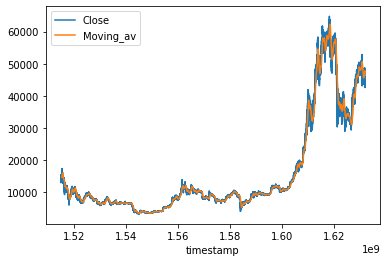

In [ ]:
# plotly graph
# 5일 단위라서 많이 겹쳐 보인다.
# btc_moving = btc.moving_average
btc_close = btc.Close

btc_close.plot()
moving_average.plot()
plt.legend(['Close', 'Moving_av'])
plt.show()

4. should find soaring Volume/Count for weight

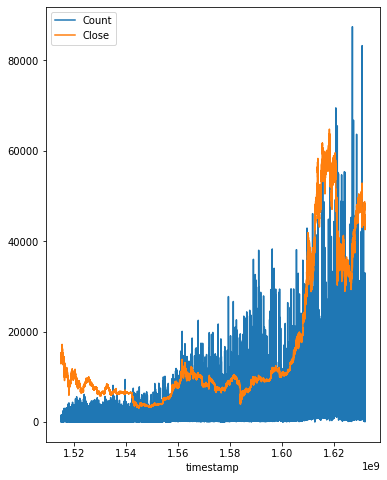

In [ ]:
plt.figure(figsize=(6, 8))
btc['Count'].plot()
btc['Close'].plot()
plt.legend(['Count', 'Close'])
plt.show()

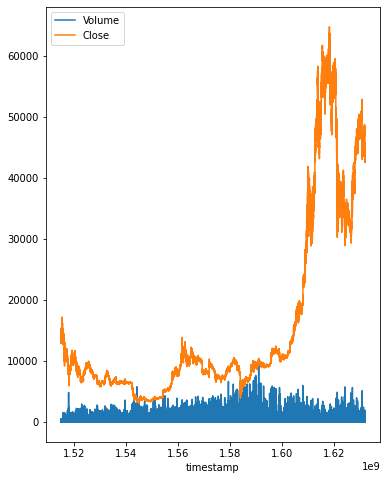

In [ ]:
plt.figure(figsize=(6, 8))
btc['Volume'].plot()
btc['Close'].plot()
plt.legend(['Volume', 'Close'])
plt.show()

In [ ]:
btcc = btc.copy()
btcc['Volume_Increasing'] = round((btc['Volume'] - btc.Volume.shift())/btc.Volume.shift() * 100, 2)
btcc['Count_Increasing'] = round((btc['Count'] - btc.Count.shift())/btc.Count.shift() * 100, 2)
btcc.head()

,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target,Volume_Increasing,Volume_weight,Count_Increasing
timestamp,,,,,,,,,,,,
1514764860,1,229.0,13835.194,14013.8,13666.11,13850.176,31.550062,13827.062093,-0.014643,NaN,0,NaN
1514764920,1,235.0,13835.036,14052.3,13680.00,13828.102,31.046432,13840.362591,-0.015037,-1.60,0,2.62
1514764980,1,528.0,13823.900,14000.4,13601.00,13801.314,55.061820,13806.068014,-0.010309,77.35,0,124.68
1514765040,1,435.0,13802.512,13999.0,13576.28,13768.040,38.780529,13783.598101,-0.008999,-29.57,0,-17.61
1514765100,1,742.0,13766.000,13955.9,13554.44,13724.914,108.501637,13735.586842,-0.008079,179.78,1,70.57


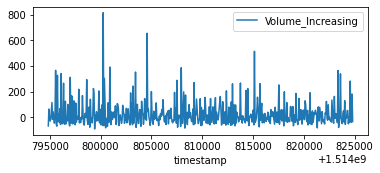

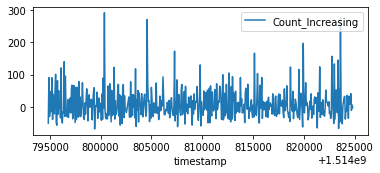

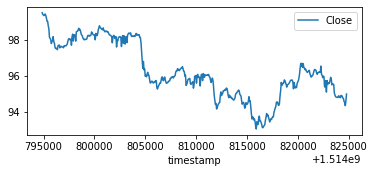

In [ ]:
btcc_normalization = btcc.Volume_Increasing.div(btcc.Volume_Increasing.iloc[0]).mul(100)
Close_normalization = btcc.Close.div(btcc.Close.iloc[0]).mul(100)


plt.figure(figsize=(6, 8))
plt.subplot(3,1,1)
btcc['Volume_Increasing'][500:1000].plot()
plt.legend(['Volume_Increasing'])
plt.show()

plt.figure(figsize=(6, 8))
plt.subplot(3,1,2)
btcc['Count_Increasing'][500:1000].plot()
plt.legend(['Count_Increasing'])
plt.show()

plt.figure(figsize=(6, 8))
plt.subplot(3,1,3)
Close_normalization[500:1000].plot()
plt.legend(['Close'])
plt.show()

5. Corelation in dataframe

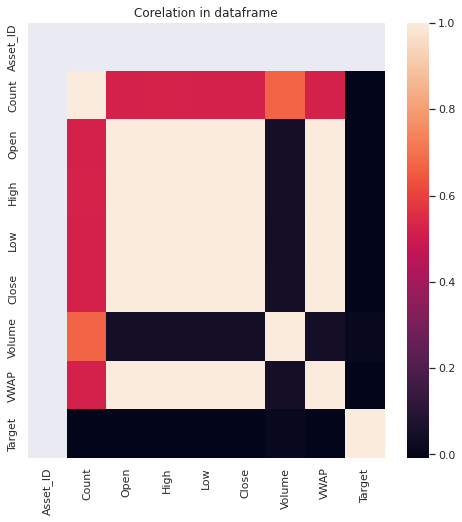

In [ ]:
btc_corr = btc.corr()

sns.set( rc = {'figure.figsize':(8, 8)} )
sns.heatmap(btc_corr)
plt.title('Corelation in dataframe')
plt.show()

# **III. 데이터 Featuring**

---



[ Specify variable ]

- Bilateral Filter(open, close, low, high)
- vmp
- volume
- volume_increasing
- volume_weight
- upper_shadow
- lower_shadow

0. Removing NaN

In [ ]:
from tqdm import tqdm

def remove_nan(df):

  R = list()
  c = list(df['Close'])                                 # 코인 종료값 리스트
  for i in range(df.shape[0]):
    future = c[min([i+16, df.shape[0]-1])]              # (16분 후 ~ 끝시점) 중의 최솟값
    past = c[min([i+1, df.shape[0]-1])]                 # (1분 후 ~ 끝시점) 중의 최솟값
    R.append(future/past)
  R = np.array(R)

  df['pred'] = R - 1
  j = np.array(list(df['Target'].isnull()))
  new_targets = np.where(j, df['pred'], df['Target'])
  df['Target'] = new_targets
  # inf to close value
  df['VWAP'] = df['VWAP'].replace([np.inf, -np.inf], np.nan)
  # nan to 'Close'
  df['VWAP'] = df['VWAP'].fillna(df['Close'])
  return df

1. upper shadow, lower shadow

In [ ]:
def upper_shadow(df):
  return df['High'] - np.maximum(df['Close'], df['Open'])

def lower_shadow(df):
  return np.minimum(df['Close'], df['Open'] - df['Low'])

def get_feature(df):
  df_get = df[['Asset_ID', 'Count', 'Open', 'High', 'Low', 'Close', 'Volume', 'VWAP', 'Target']].copy()
  df_get['Upper_shadow'] = upper_shadow(df_get)
  df_get['Lower_shadow'] = lower_shadow(df_get)
  return df_get

2. timestamp -> gap 60

In [ ]:
def timestamp_gap(df):
  df_range = range(df.index[0], df.index[-1] + 60, 60)
  df_timestamp = df.reindex(df_range, method='pad')
  return df_timestamp

3. Soaring_Volume

In [ ]:
def soaring_volume(df):
  df['Volume_Increasing'] = round((df['Volume'] - df.Volume.shift())/df.Volume.shift(), 4)
  # inf to close value
  df['Volume_Increasing'] = df['Volume_Increasing'].replace([np.inf, -np.inf], 0)
  df['Count_Increasing'] = round((df['Count'] - df.Count.shift())/df.Count.shift(), 4)
  df['Volume_weight'] = [float(i) for i in [ 1 if s > 0.3 else 0 for s in df['Volume_Increasing']]]                   # 거래량이 증가할 때 가격의 변동성이 더욱 커지는 경향이 있다. 
  return df

4. Kalman algorithm (open, close, low, high)



In [ ]:
# ! pip install filterpy

In [ ]:
# from filterpy.kalman import KalmanFilter
# kf = KalmanFilter(dim_x=3, dim_z=1)

5. Removing Outliers (X)

In [ ]:
# financial time series is data of trading. 
# Outliers in this dataframe is not error, just trading record. 
# so worried about breaking sequence. 

# def remove_outlier(df):
#   threshold = 3
#   mean = np.mean(df['VWAP'])
#   std = np.std(df['VWAP'])
#   z_score = [y for y in df['VWAP'] if abs((y-mean)/std) > 3]
#   out_df = df[df['VWAP'].isin(z_score)]
#   return out_df

# out_list = remove_outlier(btc)
# out_list.head()

# # out_lier visualizaiton
# btc.VWAP.plot()
# out_list.VWAP.plot()
# plt.show()

6. Log returns

In [ ]:
from scipy import stats
from scipy.stats import norm

# 로그 변환 처리를 위해 함수를 만들기
def log_return(series, periods=1):
    return np.log(series).diff(periods=periods)

def log(df):
  log_df = pd.concat([log_return(df.VWAP, periods=5), log_return(df.VWAP, periods=1).abs()], axis=1)
  log_df.columns = ['VAMP_5', 'VAMP_1']
  dataframe = pd.concat([df, log_df], join='inner', axis=1)
  return dataframe

In [ ]:
# featuring
def data_featuring(df):
  feat_df = remove_nan(df)
  feat_df = get_feature(df)
  feat_df = timestamp_gap(feat_df)
  feat_df = soaring_volume(feat_df)
  feat_df = log(feat_df).copy()
  feat_df = feat_df.drop(['Asset_ID', 'Open', 'High', 'Low', 'Close'], axis=1).fillna(0).copy()
  return feat_df

# **IV. Scaling**

In [ ]:
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split

def rbst_scaler(df):
  rbst_scaler = RobustScaler()
  x = df.drop('Target', axis=1).copy()
  y = df.Target
  x = x.values
  y = y.values.ravel()
  x_rbst = rbst_scaler.fit_transform(x)
  return x_rbst, y

# **V. Modeling**

In [ ]:
from lightgbm import LGBMRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score

In [ ]:
def grid_search_lgb(x, y, new_models, asset_id):
  lgbm = LGBMRegressor()
  lgb_param = {'num_leaves' : [10, 100],
               'max_depth' : [3,5,8],
               'num_leaves': [50, 100, 200],
               'min_data_in_leaf': [100, 1000]
               }
  gsLGB = GridSearchCV(lgbm, param_grid=lgb_param, cv=5, scoring="neg_mean_squared_error", n_jobs= 4, verbose = 1)
  gsLGB.fit(x, y)
  new_models[asset_id] = gsLGB.best_estimator_
  print('최적 하이퍼 파라미터: ', gsLGB.best_params_)
  print('최고 예측 정확도: {:.4f}'.format(gsLGB.best_score_))

In [ ]:
new_models = {}

for asset_id, asset_name in zip(asset_details['Asset_ID'], asset_details['Asset_Name']):
  print("GridSearchCV for: " + asset_name)
  df = train.query(f'Asset_ID == {asset_id}').set_index("timestamp")
  feat_df = data_featuring(df)
  x, y = rbst_scaler(feat_df)
  grid_search_lgb(x, y, new_models, asset_id)

GridSearchCV for: Binance Coin
Fitting 5 folds for each of 18 candidates, totalling 90 fits
최적 하이퍼 파라미터:  {'max_depth': 3, 'min_data_in_leaf': 100, 'num_leaves': 50}
최고 예측 정확도: -0.0000
GridSearchCV for: Bitcoin
Fitting 5 folds for each of 18 candidates, totalling 90 fits
최적 하이퍼 파라미터:  {'max_depth': 3, 'min_data_in_leaf': 1000, 'num_leaves': 50}
최고 예측 정확도: -0.0000
GridSearchCV for: Bitcoin Cash
Fitting 5 folds for each of 18 candidates, totalling 90 fits
최적 하이퍼 파라미터:  {'max_depth': 3, 'min_data_in_leaf': 1000, 'num_leaves': 50}
최고 예측 정확도: -0.0000
GridSearchCV for: Cardano
Fitting 5 folds for each of 18 candidates, totalling 90 fits
최적 하이퍼 파라미터:  {'max_depth': 3, 'min_data_in_leaf': 1000, 'num_leaves': 50}
최고 예측 정확도: -0.0000
GridSearchCV for: Dogecoin
Fitting 5 folds for each of 18 candidates, totalling 90 fits
최적 하이퍼 파라미터:  {'max_depth': 3, 'min_data_in_leaf': 1000, 'num_leaves': 50}
최고 예측 정확도: -0.0001
GridSearchCV for: EOS.IO
Fitting 5 folds for each of 18 candidates, totalling 90 fits

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Fitting 5 folds for each of 18 candidates, totalling 90 fits
최적 하이퍼 파라미터:  {'max_depth': 3, 'min_data_in_leaf': 1000, 'num_leaves': 50}
최고 예측 정확도: -0.0032
GridSearchCV for: Monero
Fitting 5 folds for each of 18 candidates, totalling 90 fits
최적 하이퍼 파라미터:  {'max_depth': 3, 'min_data_in_leaf': 1000, 'num_leaves': 50}
최고 예측 정확도: -0.0001
GridSearchCV for: Stellar
Fitting 5 folds for each of 18 candidates, totalling 90 fits
최적 하이퍼 파라미터:  {'max_depth': 3, 'min_data_in_leaf': 1000, 'num_leaves': 50}
최고 예측 정확도: -0.0000
GridSearchCV for: TRON
Fitting 5 folds for each of 18 candidates, totalling 90 fits
최적 하이퍼 파라미터:  {'max_depth': 3, 'min_data_in_leaf': 1000, 'num_leaves': 50}
최고 예측 정확도: -0.0000


In [ ]:
for asset_id, asset_name in zip(asset_details['Asset_ID'], asset_details['Asset_Name']):
  print(f'Tuned model for {asset_name} (ID={asset_id})')
  print(new_models[asset_id])

# **VI. Defining Train**

In [ ]:
class training_step:

  def __init__(self):
    self.model = LGBMRegressor(objective='regression',
                     metric='rmse',
                     num_leaves=50,
                     max_depth=3,
                     min_data_in_leaf=1000)      # num_iteration=1000, early_stopping_rounds= 20

  def all_featuring(self, df):
    print('------crypto start featuring------')
    crypto_df = data_featuring(df).copy()
    x, y = rbst_scaler(crypto_df)
    print('------crypto complete featuring------')
    return x, y
  
  def training(self, df):
    print('------crypto start training------')
    x, y = self.all_featuring(df)
    line = (len(x)*2)//3
    x_train = x[:line]
    x_test = x[line:]
    y_train = y[:line]
    y_test = y[line:]
    self.model.fit(x_train, y_train, 
                   eval_metric="rmse", verbose=True)
    print('------crypto compelete training------')
    print(f'model score : {self.model.score(x_test, y_test)}')
    #LGBMRegressor.plot_metric(self.model)

## **VII. Predict & Score**

In [ ]:
# maker -> ValueError: Input contains infinity or a value too large for dtype('float64').

train_step = training_step()
for id in asset_details['Asset_ID'].tolist():
  df = train.query(f'Asset_ID == {id}').set_index("timestamp")
  df_name = asset_details[asset_details['Asset_ID'] == id].Asset_Name.tolist()[0]
  print(f' training... {df_name}')
  train_step.training(df)

 training... Bitcoin Cash
------crypto start training------
------crypto start featuring------
------crypto complete featuring------
------crypto compelete training------
model score : -0.001882476707384395
 training... Binance Coin
------crypto start training------
------crypto start featuring------
------crypto complete featuring------
------crypto compelete training------
model score : -1.4654840542118261
 training... Bitcoin
------crypto start training------
------crypto start featuring------
------crypto complete featuring------
------crypto compelete training------
model score : -0.04929252412699103
 training... EOS.IO
------crypto start training------
------crypto start featuring------
------crypto complete featuring------
------crypto compelete training------
model score : -0.003179625462986335
 training... Ethereum Classic
------crypto start training------
------crypto start featuring------
------crypto complete featuring------
------crypto compelete training------
model score

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


------crypto complete featuring------
------crypto compelete training------
model score : -154.3344959938379
 training... Dogecoin
------crypto start training------
------crypto start featuring------
------crypto complete featuring------
------crypto compelete training------
model score : -0.09190490673606888
